In [1]:
import os 
import tarfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import get_file

In [2]:
DATASET_URL = 'https://datashare.is.ed.ac.uk/bitstream/handle/10283/3192/CINIC-10.tar.gz?sequence=4&isAllowed=y'
DATA_NAME = 'cinic10'
FILE_EXTENSION = 'tar.gz'
FILE_NAME = '.'.join([DATA_NAME, FILE_EXTENSION])

In [3]:
downloaded_file_location = get_file(origin=DATASET_URL, fname=FILE_NAME, extract=False)

data_directory, _ = downloaded_file_location.rsplit(os.path.sep, maxsplit=1)
data_directory = os.path.sep.join([data_directory, DATA_NAME])
tar = tarfile.open(downloaded_file_location)

if not os.path.exists(data_directory):
    tar.extractall(data_directory)

In [4]:
data_pattern = os.path.sep.join([data_directory, '*/*/*.png'])
image_dataset = tf.data.Dataset.list_files(data_pattern)

In [5]:
for file_path in image_dataset.take(1):
    sample_path = file_path.numpy()
sample_image = tf.io.read_file(sample_path)

In [6]:
sample_image = tf.image.decode_png(sample_image, channels=3)
sample_image = sample_image.numpy()

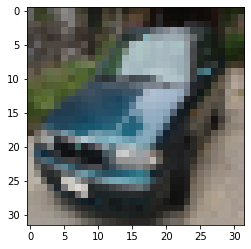

In [7]:
plt.imshow(sample_image / 255.0)

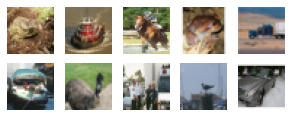

In [8]:
plt.figure(figsize=(5, 5))
for index, image_path in enumerate(image_dataset.take(10), start=1):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.convert_image_dtype(image, np.float32)
    ax =plt.subplot(5, 5, index)
    plt.imshow(image)
    plt.axis('off')
plt.show()
plt.close()